# Problem 1

In [153]:
#a)

import numpy as np

class1 = np.random.normal(-2, 1, 1000).reshape(20,50)
class2 = np.random.normal(0, 2, 1000).reshape(20,50)
class3 = np.random.normal(2, 3, 1000).reshape(20,50)

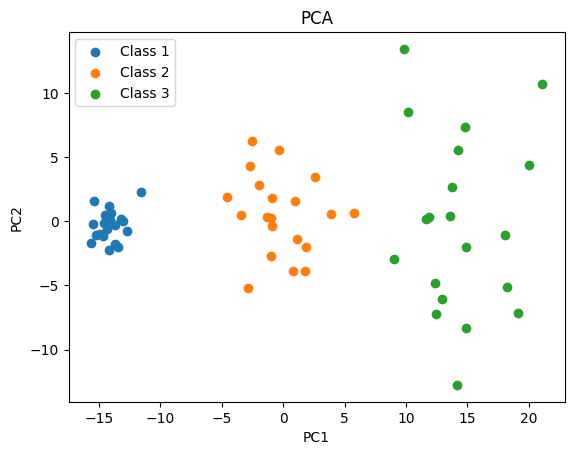

In [154]:
#b)

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

data = np.concatenate((class1, class2, class3), axis=0)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

class1_pca = data_pca[0:20]
class2_pca = data_pca[20:40]
class3_pca = data_pca[40:60]

fig, ax = plt.subplots()

ax.scatter(class1_pca[:,0], class1_pca[:,1])
ax.scatter(class2_pca[:,0], class2_pca[:,1])
ax.scatter(class3_pca[:,0], class3_pca[:,1])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend(['Class 1', 'Class 2', 'Class 3'])
ax.title.set_text('PCA')

plt.show()

In [155]:
#c)

from sklearn.cluster import KMeans

def KMeans_pipeline(n_clusters, data):
  km = KMeans(n_clusters=n_clusters)

  data_km = km.fit_predict(data)

  class1_km = data_km[0:20]
  class2_km = data_km[20:40]
  class3_km = data_km[40:60]

  #find the most common label
  most_common_class1_km = np.bincount(class1_km).argmax()
  most_common_class2_km = np.bincount(class2_km).argmax()
  most_common_class3_km = np.bincount(class3_km).argmax()

  """
  see how many predictions do not match the most common prediction, since these
  likely correspond to incorrect clusterings
  """
  class1_error = np.sum(class1_km != most_common_class1_km)
  class2_error = np.sum(class2_km != most_common_class2_km)
  class3_error = np.sum(class3_km != most_common_class3_km)

  print(f'Class 1 error: {class1_error}')
  print(f'Class 2 error: {class2_error}')
  print(f'Class 3 error: {class3_error}')

  return data_km, most_common_class1_km, most_common_class2_km, most_common_class3_km

KMeans_pipeline(3, data)
print()

Class 1 error: 0
Class 2 error: 1
Class 3 error: 7



In [156]:
#d)

KMeans_pipeline(2, data)
print()

Class 1 error: 0
Class 2 error: 2
Class 3 error: 0



**d)** After running with K=2 a few times, it seems to perform far better than with 3 clusters. In reality, we know we have should 3 clusters, though.

In [157]:
#e)

KMeans_pipeline(4, data)
print()

Class 1 error: 0
Class 2 error: 1
Class 3 error: 11



**e)** Performs worse than K=3 with respect to class3, but better with respect to the other two classes

Class 1 error: 0
Class 2 error: 0
Class 3 error: 0


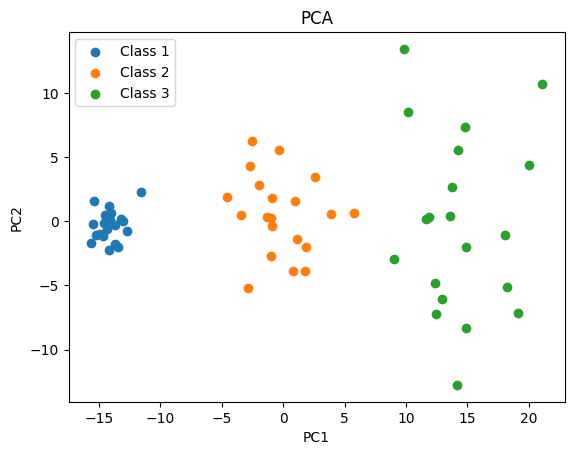

Class 1 error: 0
Class 2 error: 0
Class 3 error: 0


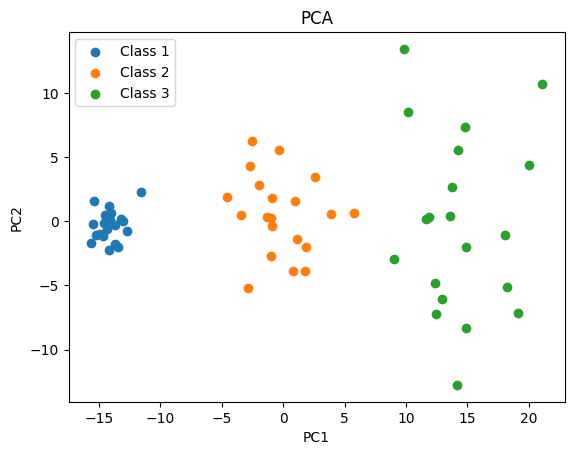

Class 1 error: 0
Class 2 error: 0
Class 3 error: 0


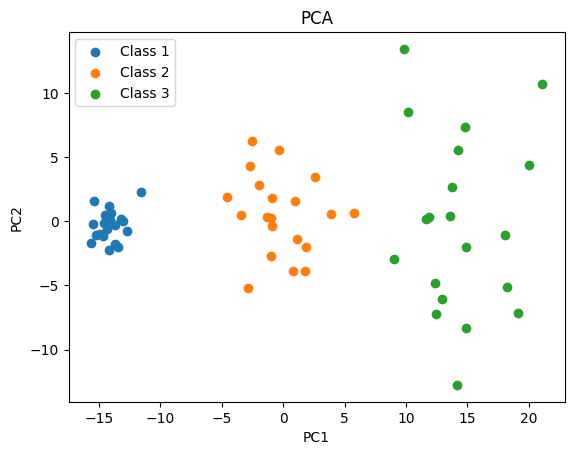

Class 1 error: 0
Class 2 error: 0
Class 3 error: 0


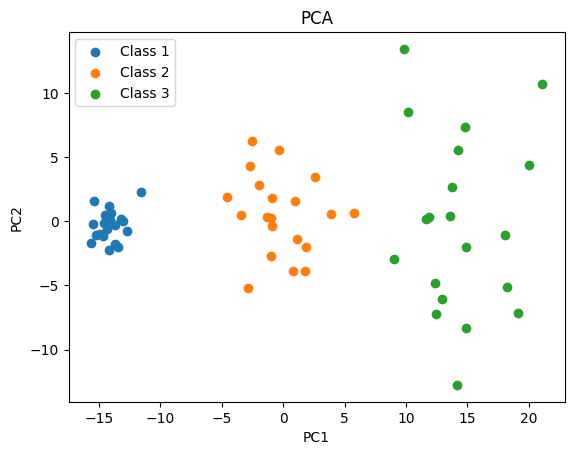

Class 1 error: 0
Class 2 error: 8
Class 3 error: 9


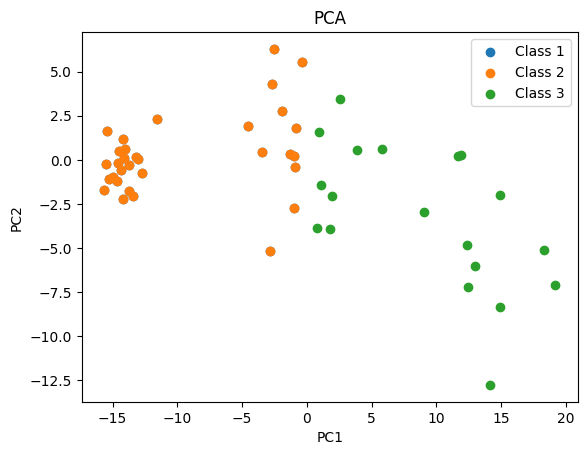

In [166]:
#f)

for i in range(5):
  data_pca_km, mcv_class1_km, mcv_class2_km, mcv_class3_km = KMeans_pipeline(3, data_pca)

  class1_mask = (data_pca_km == mcv_class1_km)
  class2_mask = (data_pca_km == mcv_class2_km)
  class3_mask = (data_pca_km == mcv_class3_km)

  class1_pca_km = data_pca[class1_mask]
  class2_pca_km = data_pca[class2_mask]
  class3_pca_km = data_pca[class3_mask]

  fig, ax = plt.subplots()

  ax.scatter(class1_pca_km[:,0], class1_pca_km[:,1])
  ax.scatter(class2_pca_km[:,0], class2_pca_km[:,1])
  ax.scatter(class3_pca_km[:,0], class3_pca_km[:,1])

  ax.set_xlabel('PC1')
  ax.set_ylabel('PC2')

  ax.legend(['Class 1', 'Class 2', 'Class 3'])
  ax.title.set_text('PCA')

  plt.show()

**f)** Most of the time it gets the clusterings 100% right, but there I showed an example of it not working, also.

In [178]:
#g)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

for i in range(5):
  KMeans_pipeline(3, data_scaled)
  print()

Class 1 error: 0
Class 2 error: 9
Class 3 error: 3

Class 1 error: 0
Class 2 error: 0
Class 3 error: 1

Class 1 error: 0
Class 2 error: 0
Class 3 error: 2

Class 1 error: 0
Class 2 error: 0
Class 3 error: 1

Class 1 error: 0
Class 2 error: 3
Class 3 error: 10



**g)** I imagine that scaling, then applying pca, then applying kmeans clustering would result in the best process thus far. I think pca then kmeans clustering is better than scaling then kmeans clustering, which is what we did in this part.

# Problem 2

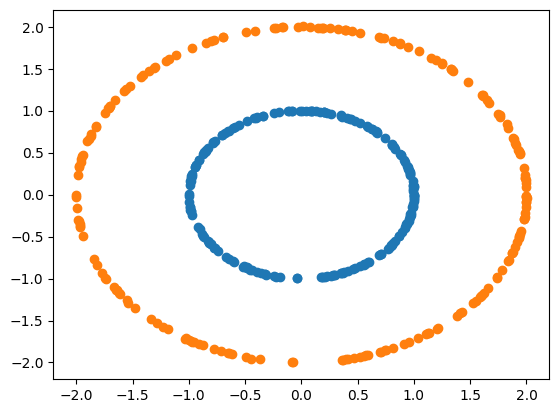

In [221]:
import math

t = np.random.uniform(0, 2 * math.pi, 200)

x1_1 = np.cos(t)
x2_1 = np.sin(t)

x1_2 = 2 * np.cos(t)
x2_2 = 2 * np.sin(t)

noise_1 = np.random.normal(0, 0.05**2, 200)
noise_2 = np.random.normal(0, 0.05**2, 200)

x1_1, x2_1 = x1_1 + noise_1, x2_1 + noise_1
x1_2, x2_2 = x1_2 + noise_2, x2_2 + noise_2

fig, ax = plt.subplots()

ax.scatter(x1_1, x2_1)
ax.scatter(x1_2, x2_2)

plt.show()

(200, 2)
(200, 2)
(400, 2)


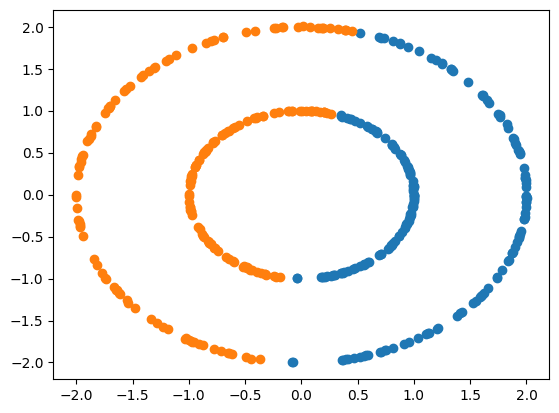

In [222]:
#a)

circle1 = np.vstack((x1_1, x2_1)).T
circle2 = np.vstack((x1_2, x2_2)).T
circles = np.concatenate((circle1, circle2), axis=0)

print(circle1.shape)
print(circle2.shape)
print(circles.shape)

km = KMeans(n_clusters=2)
km.fit(circles)
labels = km.labels_

fig, ax = plt.subplots()

for cluster in range(4):
  ax.scatter(circles[labels == cluster][:,0], circles[labels == cluster][:,1])

plt.show()